# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [168]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [169]:
#API URL 
url="http://api.openweathermap.org/data/2.5/weather"
#Initial creation of API parameters
location=""
parameters= { 
              "q": location,
              "appid": api_key,
              "units": "imperial"
            }

#Name Dataframe columns
dataframe_columns=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]

#Create empty data frame
cities_df=pd.DataFrame(columns=dataframe_columns)

#reset counter
i=1

# find start time and start message
start_time=time.ctime()
print(f"Beginning Data Retrieval at {start_time}\n",     
      f"-----------------------------")

# Set up the chunking variables
batch_counter=0
batch_start=time.time()

#Loop to pull API data
for city in cities:
    #assign city to the API parameters
    parameters["q"]=city
    #Print Processessing, increment counter, and call API
    print(f"{int(i/len(cities)*100)}% Done. Processing record {i} of {len(cities)} | {city}")
    i+=1
    city_data=requests.get(url,params=parameters)
    #make sure there's a valid response
    if city_data.status_code == 200:
        #This try drops anything that has a null field so I don't have to later
        try:
            #Get the needed values from the API and add them to a dict
            city_json=city_data.json()
            cityname=city_json["name"] 
            cloudiness=city_json["clouds"]["all"] 
            country=city_json["sys"]["country"]
            epoch_time=city_json["dt"]        
            humidity=city_json["main"]["humidity"]     
            lat=city_json["coord"]["lat"]          
            lon=city_json["coord"]["lon"]           
            max_temp=city_json["main"]["temp_max"] 
            wind_speed=city_json["wind"]["speed"]
            city_dict={ "City": cityname, 
                        "Cloudiness": cloudiness, 
                        "Country": country, 
                        "Date": epoch_time, 
                        "Humidity":humidity, 
                        "Lat":lat, 
                        "Lng": lon, 
                        "Max Temp":max_temp, 
                        "Wind Speed":wind_speed}
            #Append the dict as a row to the dataframe
            cities_df=cities_df.append(city_dict, ignore_index=True)
        except:
            print(f"Data missing skipping {city}")
            
    else:
        print(f"City not found. error {city_data.status_code} Skipping...")

# This next bit of code is for throttling requests. It is not necessarily needed  
# Add to the batch counter and see if there were 60 requests
    batch_counter+=1
    if batch_counter >= 60:
        #Calculate time of last request and how much time to do the requests
        batch_end=time.time()
        time_passed=batch_end - batch_start
        print(f"Waiting {int(60-time_passed)} seconds to avoid api cap")
        #pause of the remainder of the minute
        time.sleep(60-time_passed)       
        #reset the batch counter and the start time
        batch_counter=0
        batch_start=time.time()

end_time=time.ctime()        
print(
    f"-----------------------------\n"
    f"Data Retrieval Complete at {end_time}\n"   
    f"-----------------------------\n"
    )


Beginning Data Retrieval at Tue Apr  2 17:02:03 2019
 -----------------------------
0% Done. Processing record 1 of 611 | tuktoyaktuk
0% Done. Processing record 2 of 611 | rikitea
0% Done. Processing record 3 of 611 | busselton
0% Done. Processing record 4 of 611 | thompson
0% Done. Processing record 5 of 611 | coquimbo
0% Done. Processing record 6 of 611 | butaritari
1% Done. Processing record 7 of 611 | punta arenas
1% Done. Processing record 8 of 611 | port lincoln
1% Done. Processing record 9 of 611 | nizhneyansk
City not found. error 404 Skipping...
1% Done. Processing record 10 of 611 | lazaro cardenas
1% Done. Processing record 11 of 611 | east london
1% Done. Processing record 12 of 611 | mataura
2% Done. Processing record 13 of 611 | port elizabeth
2% Done. Processing record 14 of 611 | hobart
2% Done. Processing record 15 of 611 | hermanus
2% Done. Processing record 16 of 611 | sao filipe
2% Done. Processing record 17 of 611 | tutoia
2% Done. Processing record 18 of 611 | arr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [170]:
cities_df.to_csv("city_data.csv")
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
City          543 non-null object
Cloudiness    543 non-null object
Country       543 non-null object
Date          543 non-null object
Humidity      543 non-null object
Lat           543 non-null float64
Lng           543 non-null float64
Max Temp      543 non-null float64
Wind Speed    543 non-null float64
dtypes: float64(4), object(5)
memory usage: 38.3+ KB


In [171]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuktoyaktuk,20,CA,1554235200,70,69.44,-133.03,-2.21,10.29
1,Rikitea,12,PF,1554238923,100,-23.12,-134.97,76.15,16.71
2,Busselton,0,AU,1554238807,51,-33.64,115.35,61.00,22.97
3,Thompson,90,CA,1554235200,61,55.74,-97.86,15.80,13.87
4,Coquimbo,0,CL,1554235200,68,-29.95,-71.34,66.20,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

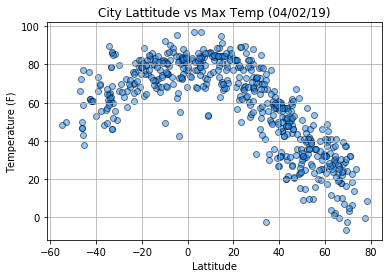

In [232]:
#Funtion to add labels and formatting
def plot_format(title, y_label, timestamp ):
    date=time.strftime("%m/%d/%y",time.localtime(timestamp))
    plt.xlabel("Lattitude")
    plt.ylabel(y_label)
    plt.title(f"{title} ({date})")
    plt.grid(b=True)


#I'm going to use the date of the first request to be the date on the graph
graph_date=cities_df["Date"][0]




plt.scatter(cities_df["Lat"], cities_df["Max Temp"], color="DodgerBlue", alpha=.5, edgecolors="black")

plot_format("City Lattitude vs Max Temp","Temperature (F)",graph_date)

plt.show()

#### Latitude vs. Humidity Plot

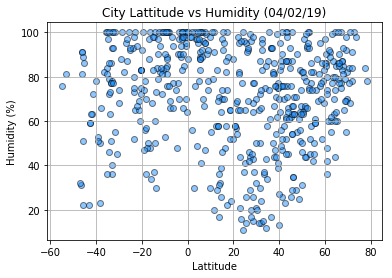

In [233]:
# Handle humidity outliers and drop humidity over 100
humidity_df=cities_df.loc[cities_df["Humidity"] <= 100]

# Plot the graph

plt.scatter(humidity_df["Lat"], humidity_df["Humidity"], color="DodgerBlue", alpha=.5, edgecolors="black")

# Format the graph
plot_format("City Lattitude vs Humidity","Humidity (%)",graph_date)

plt.show()

#### Latitude vs. Cloudiness Plot

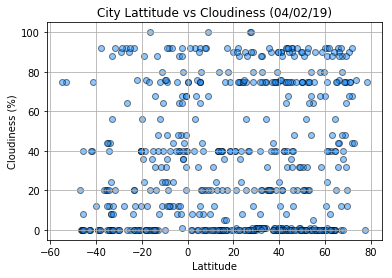

In [234]:
# I didn't seem to have any cloudiness outliers, so I didn't make logic to drop those
#plot the graph

plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], color="DodgerBlue", alpha=.5, edgecolors="black")
#format the graph
plot_format("City Lattitude vs Cloudiness","Cloudiness (%)",graph_date)

plt.show()

#### Latitude vs. Wind Speed Plot

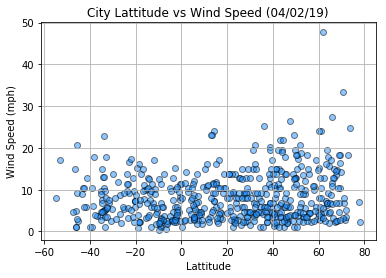

In [235]:
#plot the graph
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], color="DodgerBlue", alpha=.5, edgecolors="black")
#format the graph
plot_format("City Lattitude vs Wind Speed","Wind Speed (mph)",graph_date)

plt.show()

# Three Observations

## Observation 1
The max temperature is higher closer to the equater. It's also shifted more to the north due to northern hemisphere winter.

## Observation 2
Lattitude has no affect on cloudiness

## Observation 3
Lattitude has no affect on Humidity